In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [24]:
#Loading data
data = pd.read_csv("/content/Nat_Gas.csv")

In [25]:
data['Dates'] = pd.to_datetime(data['Dates'])

<ipython-input-25-c4b63a4f535a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'])


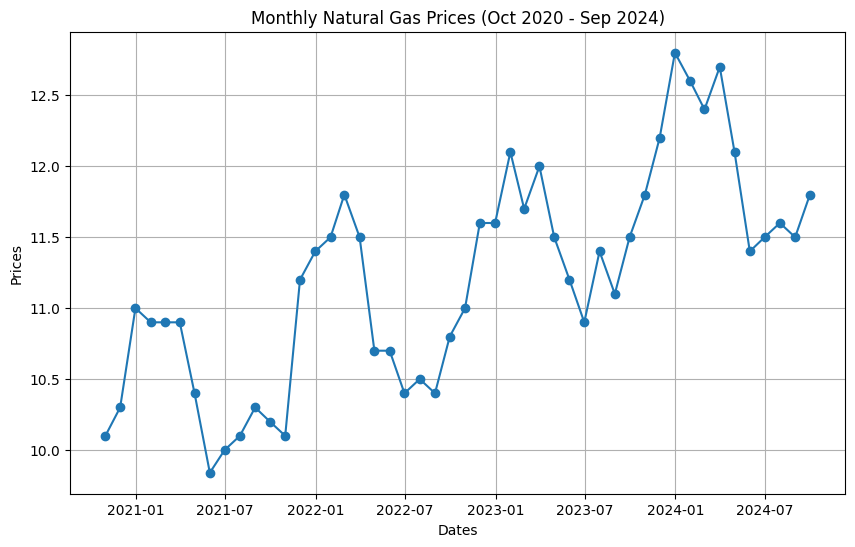

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-')
plt.title('Monthly Natural Gas Prices (Oct 2020 - Sep 2024)')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.grid(True)
plt.show()

In [27]:
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month




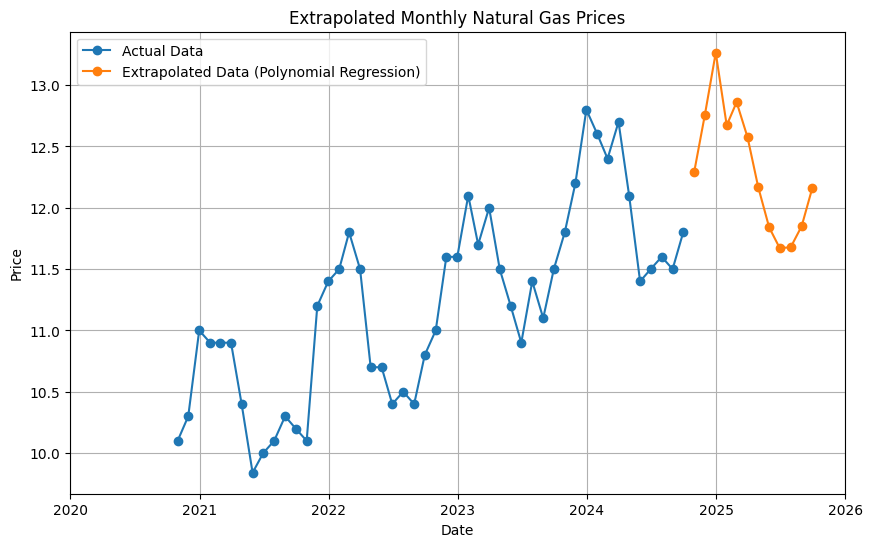

In [28]:


# Define the degree of the polynomial
degree = 5  # You can adjust this parameter

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_poly, y)

# Extrapolate prices for the next year on a monthly interval
next_year_dates = pd.date_range(start=data['Dates'].iloc[-1], periods=13, freq='M')[1:]
next_year_monthly_data = pd.DataFrame({'Year': next_year_dates.year, 'Month': next_year_dates.month})
next_year_monthly_data['Prices'] = poly_model.predict(poly_features.transform(next_year_monthly_data[['Year', 'Month']]))

# Visualize the extrapolated data
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-', label='Actual Data')
plt.plot(next_year_dates, next_year_monthly_data['Prices'], marker='o', linestyle='-', label='Extrapolated Data (Polynomial Regression)')
plt.title('Extrapolated Monthly Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2026-01-01'))
plt.show()
